In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16'

In [113]:

cutoff_length=2*math.pi*10**(-4)
alpha=-1*cutoff_length**2
c=1

In [3]:

def det_Ginv(cutoff_length, l, alpha=1, c=1):
    prod_=1
    maxq= math.floor(1/cutoff_length)
    minq=math.floor(1/l)
    #print(maxq, minq)
    #doing a square shell:
    #        |  
    #        |   ##
    #   ------------
    #        |   ##
    #        |   ##
    #this domain x4
    for qx in range(minq,maxq ):
        for qy in range(-maxq+1,minq):
            prod_*=(alpha*l**2+c*(qx**2+qy**2))/(2*math.pi*l)
    return prod_**4

In [4]:

def det_lnGinv(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length)
    minq=math.floor(1/l)
    #print(maxq, minq)
    #doing a square shell:
    #        |  
    #        |   ##
    #   ------------
    #        |   ##
    #        |   ##
    #this domain x4
    for qx in range(minq,maxq ):
        for qy in range(-maxq+1,minq):
            try:
                sum_+=math.log((alpha+c*(qx**2+qy**2))/(2*math.pi*l))
            except ValueError:
                print(alpha, alpha*l**2, c, qx**2, qy**2, (alpha*l**2+c*(qx**2+qy**2))/(2*math.pi*l))
                raise ValueError
    return 4*sum_

In [5]:
def det_lnGinv_radial(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= math.floor(1/cutoff_length*2/math.sqrt(math.pi))
    minq=math.floor(1/l*2/math.sqrt(math.pi))
    #print(minq, maxq)
    for qx in range(minq,maxq ):
            try:
                sum_+=qx*math.log((alpha*l**2+c*(qx**2))/(2*math.pi*l))
            except ValueError:
                print(alpha, alpha*l**2, c, qx**2, (alpha*l**2+c*(qx**2))/(2*math.pi))
                raise ValueError
    return 2*math.pi*sum_*1

In [6]:
def formula(cutoff_length, l, alpha=1, c=1):
    maxq= l*cutoff_length
    minq=cutoff_length
    try:
        assert(c>0)
        ans = c*(maxq**2-minq**2)*(1+math.log(2*math.pi))+(alpha*l**2+c*maxq**2)*math.log(1/(alpha*l**2 + c* maxq**2)
           ) - (alpha*l**2+c*minq**2)*math.log(1/(alpha*l**2 + c* minq**2))
        ans-= math.log(l**2)
    except AssertionError:
        if c==0:
            return -math.pi/2*((maxq**2-minq**2)*(1+math.log(2*math.pi))-math.log(l**2))
        else:
            raise AssertionError
    except ValueError:
        return np.nan
    return ans*-math.pi/(2*c)

In [7]:
def formula_2(cutoff_length, l, alpha=1, c=1):
    maxq= l/cutoff_length
    minq=1/cutoff_length
    try:
        assert(c>0)
        ans=c*(1+math.log(math.pi))*(maxq**2-minq**2)+2*(alpha*l**2 + c *maxq**2)*math.log(l**2/math.sqrt(alpha*l**2+c*maxq**2
                ))-2*(alpha*l**2 + c *minq**2)*math.log(l**2/math.sqrt(alpha*l**2+c*minq**2 ))
    except AssertionError:
        if c==0:
            return -math.pi/2*(maxq**2-minq**2)*(1+math.log(2*math.pi))
        else:
            raise AssertionError
    except ValueError:
        return np.nan
    return ans*-math.pi/(2*c)

In [8]:
alpha_0=1
c=1
cutoff_length=2*math.pi*10**(-3)
def formula_3(cell_dims): #as in simulation
    l_max = max(cell_dims)/cutoff_length
    l_min = min(cell_dims)/cutoff_length #ls,cutoff_length in units of cutoff length
    area = l_min*l_max
    qmax = l_max
    smaller_qmin=1 #=cutoff_lenth=1
    larger_qmin=l_max/l_min
    alpha_rescaled = alpha_0*l_max**2
    try:
        ans =  
        
        ans *= -math.pi/(2*c)
    except ValueError:
        print("non-renormalizable : alpha_0 l^2 + c q^2 < 0 encountered with alpha_0=", self.alpha_0, "l^2=", area,
            "c=",c, "q range ",smaller_qmin, "to", qmax, "or c=0")
        raise ValueError
    if l_max != l_min:
        sidewidth=2*l_min
        if alpha>0:
            k1=math.sqrt(alpha_rescaled/c) #problems if alpha<=0
        #has imaginary value ->0?
        else:
            k1=0
        ans-=2*sidewidth*(k1*(math.atan(larger_qmin**2/k1)-math.atan(smaller_qmin**2/k1))+.5*(larger_qmin*(
              2+4*math.log(l)+math.log(math.pi/(alpha_rescaled+c*larger_qmin**2)))-smaller_qmin*(
              2+4*math.log(l)+math.log(math.pi/(alpha_rescaled+c*smaller_qmin**2)))))
    return ans/area 

In [9]:
#mean energy rather than free energy F=<E>-TS.  Same as above without the entropy-like part
def mean_energy(cell_dims,beta=1): #as in simulation
    l_max = max(cell_dims)/cutoff_length
    l_min = min(cell_dims)/cutoff_length #ls,cutoff_length in units of cutoff length
    area = cell_dims[0]*cell_dims[1]
    qmax = math.sqrt(l_max*l_min)
    smaller_qmin=math.sqrt(l_min/l_max) #=cutoff_lenth=1
    larger_qmin=math.sqrt(l_max/l_min)
    #print(l_min, l_max)
    alpha_rescaled = alpha_0*l_min*l_max
    #print(area)
    try:
        ans = c*(1+math.log(math.pi))*(qmax**2-larger_qmin**2)+(alpha_rescaled+ c *qmax**2)*math.log(1/math.sqrt(alpha_rescaled+c*qmax**2
                ))-(alpha_rescaled + c *larger_qmin**2)*math.log(1/math.sqrt(alpha_rescaled+c*larger_qmin**2 ))
    except ValueError:
        print("non-renormalizable : alpha_0 l^2 + c q^2 < 0 encountered with alpha_0=", alpha_0, "l^2=", area,
            "c=",c, "q range ",smaller_qmin, "to", qmax, "or c=0")
        raise ValueError
    if False or l_max != l_min:
        qdiff=larger_qmin-smaller_qmin
        ans_addition=0
        if alpha_0>0:
            k1=math.sqrt(alpha_rescaled/c) #problems if alpha<=0
            #print(k1,k1**3)
            ans_addition= 12*k1**3*c*(math.atan(larger_qmin/k1)-math.atan(smaller_qmin/k1))
            #print(math.atan(larger_qmin/k1)-math.atan(smaller_qmin/k1))
            #print(ans_addition)
        polynomial1=0#12*alpha_rescaled+5*c*smaller_qmin**2+5*c*smaller_qmin*larger_qmin-4*c*larger_qmin**2
        polynomial2=-9*alpha_rescaled*smaller_qmin#-9*c*smaller_qmin*larger_qmin**2+6*c*larger_qmin**3
        polynomial3=3*alpha_rescaled*smaller_qmin#+c*smaller_qmin**3
        ans_addition+=-polynomial1*qdiff+polynomial2*math.log(math.pi/(alpha_rescaled+c*larger_qmin**2)
              ) + 3*polynomial3*math.log(math.pi/(alpha_rescaled+c*smaller_qmin**2))
        ans_addition*=(-math.pi)/(18*qdiff*c)
        #ans+=ans_addition
    return ans/area

In [10]:
#doing beta derivatice right
alpha_0=1
c=1
cutoff_length=2*math.pi*10**(-3)
def mean_energy2(cell_dims,beta=1): #as in simulation
    l_max = max(cell_dims)/cutoff_length
    l_min = min(cell_dims)/cutoff_length #ls,cutoff_length in units of cutoff length
    area = l_max*l_min
    qmax = math.sqrt(l_max*l_min)
    smaller_qmin=math.sqrt(l_min/l_max) #=cutoff_lenth=1
    larger_qmin=1#math.sqrt(l_max/l_min)
    #print(l_min, l_max)
    alpha_rescaled = alpha_0*l_min*l_max
    #print(area)
    try:
        #ans = c*(1+math.log(math.pi))*(qmax**2-larger_qmin**2)+(alpha_rescaled+ c *qmax**2)*math.log(1/math.sqrt(alpha_rescaled+c*qmax**2
        #        ))-(alpha_rescaled + c *larger_qmin**2)*math.log(1/math.sqrt(alpha_rescaled+c*larger_qmin**2 ))
        ans = (qmax**2-larger_qmin**2)*(1/(2*beta))
        #print(larger_qmin/area)
    except ValueError:
        print("non-renormalizable : alpha_0 l^2 + c q^2 < 0 encountered with alpha_0=", alpha_0, "l^2=", area,
            "c=",c, "q range ",smaller_qmin, "to", qmax, "or c=0")
        raise ValueError
    return ans/area

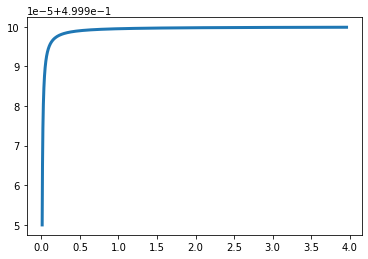

In [11]:
for cutoff_length in [.001]:
        plt.plot([l**2 for l in np.arange(.1, 2,.01)], [mean_energy2((l,l)) for l in np.arange(.1, 2,.01)], linewidth=3)

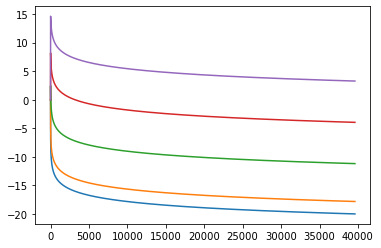

In [12]:
for alpha in [0, 1, 100, 10000, 1000000]:
    plt.plot([l**2 for l in np.arange(1, 200,1)],[formula_2(1,l,alpha,1)/l**2 for l in np.arange(1, 200,1)])

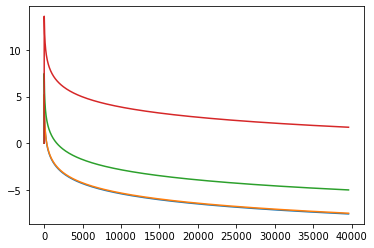

In [13]:
for c in [1, 100, 10000, 1000000]:
    plt.plot([l**2 for l in np.arange(1, 200,1)],[formula_2(1,l,1000,c)/l**2 for l in np.arange(1, 200,1)])

In [122]:
ls = [cutoff_length*x for x in range(2, 500, 3)]

Pictures for report:

F_0', F_0'/l**2

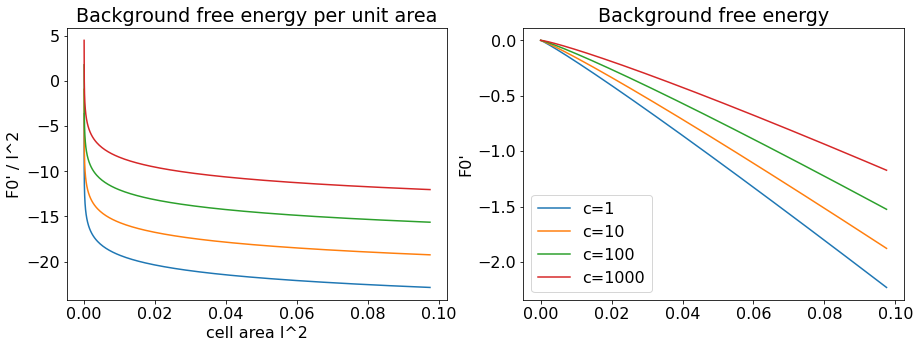

In [124]:
fig, axs = plt.subplots(1,2, sharex=False, sharey=False, figsize=(15,5))
alpha_0=1*(cutoff_length**2)
for c in [ 1, 10,100, 1000]:
    axs[0].plot([l**2 for l in ls], [formula_3((l,l)) for l in ls])
    axs[1].plot([l**2 for l in ls], [formula_3((l,l))*l**2 for l in ls], label="c="+str(c))
axs[0].set_title("Background free energy per unit area")
axs[1].set_title("Background free energy")
axs[0].set_ylabel("F0' / l^2")
axs[1].set_ylabel("F0'")
axs[0].set_xlabel("cell area l^2")
axs[0].set_xlabel("cell area l^2")
axs[1].legend()

Text(0.5, 0, 'cell area l^2')

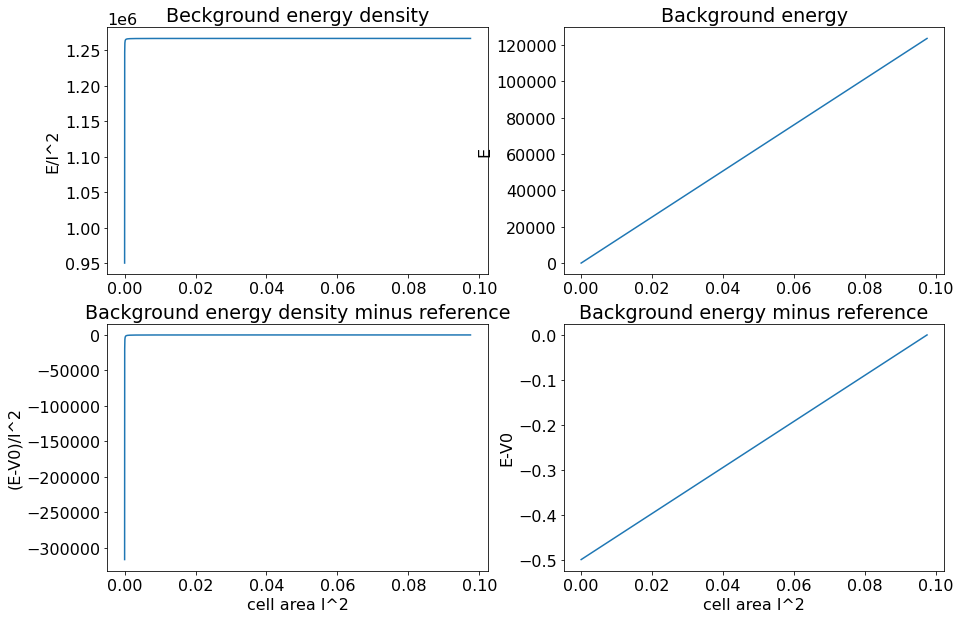

In [123]:
#mean energy and mean energy per area,
# + with V_0 correction

fig, axs = plt.subplots(2,2, sharex=False, figsize=(15,10))
alpha_0=1*(cutoff_length**2)
c=1
axs[0][0].plot([l**2 for l in ls], [mean_energy2((l,l))/cutoff_length**2 for l in ls])
axs[0][1].plot([l**2 for l in ls], [mean_energy2((l,l))*l**2/cutoff_length**2 for l in ls])
axs[1][0].plot([l**2 for l in ls], [(mean_energy2((l,l))-mean_energy2((max(ls), max(ls))))/cutoff_length**2 for l in ls])
axs[1][1].plot([l**2 for l in ls], [(mean_energy2((l,l))-mean_energy2((max(ls), max(ls))))*l**2/cutoff_length**2 for l in ls])
axs[0][0].set_title("Beckground energy density")
axs[0][1].set_title("Background energy")
axs[1][0].set_title("Background energy density minus reference")
axs[1][1].set_title("Background energy minus reference")
axs[0][0].set_ylabel("E/l^2")
axs[0][1].set_ylabel("E")
axs[1][0].set_ylabel("(E-V0)/l^2")
axs[1][1].set_ylabel("E-V0")
axs[1][0].set_xlabel("cell area l^2")
axs[1][1].set_xlabel("cell area l^2")